In [55]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random

## i create a dummy signal  

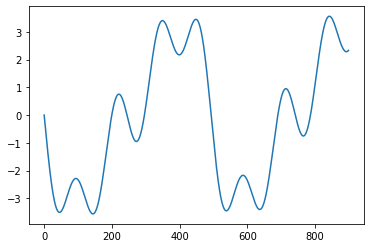

In [56]:
t=np.arange(10000)
omega=2*3.14*2
a=0.1*np.sin(omega*t)
a1=np.sin(omega*t)
b=3*np.sin(2*omega*t)
b1=np.sin(2*omega*t)
c=np.sin(4*omega*t)
d=5*np.sin(8*omega*t)
d1=np.sin(8*omega*t)
e=a+b+c+d/4
plt.plot(e[0:900])
z=np.random.uniform(-0.5,0.5,900).reshape(1,900)


In [57]:
m=e[0:900]+z
m.reshape(1,-1)

array([[ 1.27368263e-02, -5.67157033e-01,  7.45888373e-03,
         9.77154287e-02, -3.79944568e-01, -5.94340681e-01,
        -1.12821063e+00, -4.22546782e-01, -1.22247059e+00,
        -1.24257863e+00, -1.25398447e+00, -1.08200828e+00,
        -1.18819682e+00, -1.32873757e+00, -2.03697329e+00,
        -1.33077356e+00, -1.95120272e+00, -1.99627406e+00,
        -1.94556756e+00, -2.24661768e+00, -2.18974519e+00,
        -2.28973199e+00, -2.69737582e+00, -2.73814179e+00,
        -2.33887403e+00, -3.23946730e+00, -2.91866630e+00,
        -2.88070274e+00, -3.06080794e+00, -3.29737675e+00,
        -3.03040569e+00, -3.26418112e+00, -3.04063566e+00,
        -2.73806711e+00, -3.07333356e+00, -3.08189261e+00,
        -2.88381324e+00, -2.98384022e+00, -3.22184367e+00,
        -3.27941533e+00, -3.74372781e+00, -3.79958062e+00,
        -3.01836884e+00, -3.87289392e+00, -3.05905675e+00,
        -3.95787490e+00, -3.09372023e+00, -3.95195828e+00,
        -3.01626777e+00, -3.70280237e+00, -3.54774130e+0

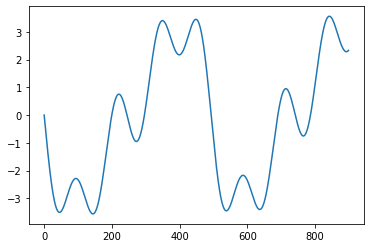

In [58]:

plt.plot(e[0:900])
plt.show()

In [59]:
kk=pd.DataFrame()


In [60]:
kk['a']=a1[0:900]
kk['b']=b1[0:900]
kk['c']=c[0:900]
kk['d']=d1[0:900]
kk['sigint']=m[0:900].reshape(-1,1)

In [61]:
kk.head()

,a,b,c,d,sigint
0,0.000000,0.000000,0.000000,0.000000,0.012737
1,-0.006371,-0.012741,-0.025480,-0.050943,-0.567157
2,-0.012741,-0.025480,-0.050943,-0.101753,0.007459
3,-0.019111,-0.038214,-0.076373,-0.152300,0.097715
4,-0.025480,-0.050943,-0.101753,-0.202451,-0.379945


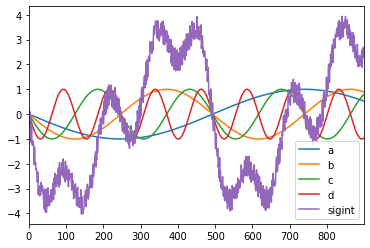

In [62]:
kk.plot()

In [64]:
from sklearn.linear_model import LinearRegression
X=kk[["a","b","c","d"]]
y=kk["sigint"]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9849376240009869

In [65]:
pred=reg.predict(X)

In [66]:
kk["Predicted"]=pred

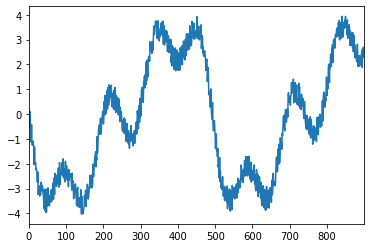

In [67]:
kk["sigint"].plot()

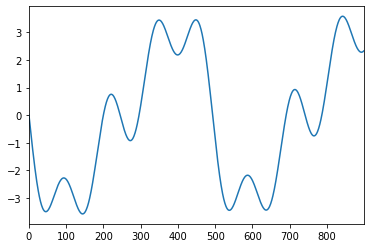

In [68]:
kk["Predicted"].plot()

In [69]:
reg.coef_

array([0.08735162, 3.02298044, 0.98445086, 1.25613238])

___What i am trying to do is create a general formula for a sound signal of an instrument for its one note by using collection of sin wave harmonics___
What i have done:
* created a signal using different amplitudes for sinwaves whose frequecies increase in by 2 every time 
* i have used f 2f 4f and 8f sinwaves with varrying amplitude to generate a wave. I add them and divide resultant vector by 4
* Then i add noise to the resultant wave
* so this somehow represents how a real world arbitary sound wave would look

* now i take a table with vectors of each frequency of sinwave 
* i append the input wave to this 

* Apply least squares linear regression to this to calculate the weights

Observations till  now :

* we get a good waveform which is similar to the input waveform

## Most Important Observation here is that the we obtain a general formula for the input noisy wave and can now generate a wave which is perfect with no noise

In [70]:
import scipy.io.wavfile
a,wave=scipy.io.wavfile.read('flute1.wav', mmap=False)
b=44100/1008
b

43.75

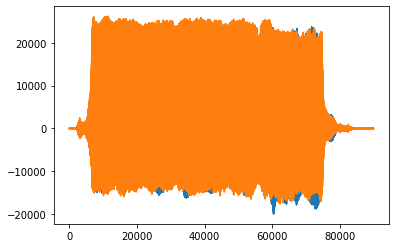

In [71]:
plt.plot(wave)

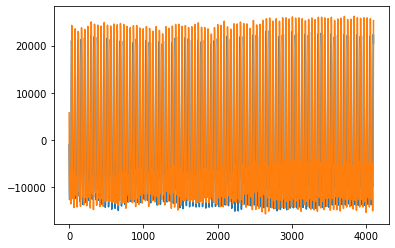

In [72]:
plt.plot(wave[7500:11600])

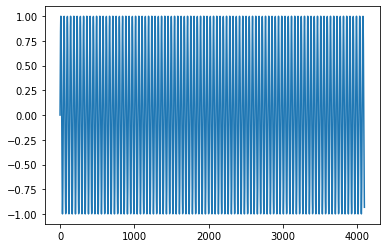

In [73]:
t=np.arange(4100)
omega=2*np.pi/43.75
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(3*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(4*omega*t)
e=np.sin(5*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(3*omega*t)
i=np.cos(4*omega*t)
j=np.cos(5*omega*t)
a1=np.sin(6*omega*t)
# a1=np.sin(omega*t)
b1=np.sin(7*omega*t)
# b1=np.sin(2*omega*t)
c1=np.sin(8*omega*t)
# d=5*np.sin(8*omega*t)
d1=np.sin(9*omega*t)
e1=np.sin(10*omega*t)
f1=np.cos(6*omega*t)
g1=np.cos(7*omega*t)
h1=np.cos(8*omega*t)
i1=np.cos(9*omega*t)
j1=np.cos(10*omega*t)
n=np.random.uniform(-1,1,4100).reshape(1,4100)

plt.plot(a)


In [74]:
sins=pd.DataFrame()

In [75]:
sins["a"]=a
sins["b"]=b
sins["c"]=c
sins["d"]=d
sins["e"]=e
sins["f"]=f
sins["g"]=g
sins["h"]=h
sins["i"]=i
sins["j"]=j
sins["a1"]=a1
sins["b1"]=b1
sins["c1"]=c1
sins["d1"]=d1
sins["e1"]=e1
sins["f1"]=f1
sins["g1"]=g1
sins["h1"]=h1
sins["i1"]=i1
sins["j1"]=j1
sins["n"]=n.reshape(-1,1)

# sins["signal"]=
signal=wave[7500:11600]
sig = np.array(signal[:, 0]).reshape(-1, 1)
print(sig.shape)
sig=sig

sins["sign"]=sig

(4100, 1)


In [76]:
sins.head()

,a,b,c,d,e,f,g,h,i,j,...,c1,d1,e1,f1,g1,h1,i1,j1,n,sign
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.171341,-981
1,0.143122,0.283298,0.417641,0.543384,0.657939,0.989705,0.959032,0.908612,0.839484,0.753071,...,0.912324,0.961536,0.990950,0.651153,0.535827,0.409468,0.274679,0.134233,0.128788,-4611
2,0.283298,0.543384,0.758947,0.912324,0.990950,0.959032,0.839484,0.651153,0.409468,0.134233,...,0.747136,0.528227,0.266037,-0.152000,-0.425779,-0.664672,-0.849103,-0.963963,-0.813449,-7761
3,0.417641,0.758947,0.961536,0.988380,0.834573,0.908612,0.651153,0.274679,-0.152000,-0.550897,...,-0.300468,-0.671351,-0.919528,-0.849103,-0.992115,-0.953792,-0.741139,-0.393025,-0.047302,-10268
4,0.543384,0.912324,0.988380,0.747136,0.266037,0.839484,0.409468,-0.152000,-0.664672,-0.963963,...,-0.993200,-0.897038,-0.512899,-0.953792,-0.637424,-0.116423,0.441953,0.858449,-0.526667,-11933


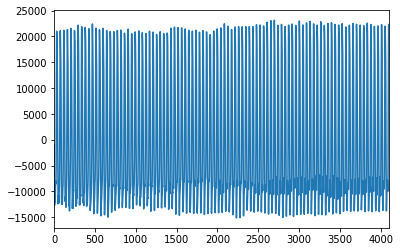

In [77]:
sins["sign"].plot()

In [79]:
from sklearn.linear_model import LinearRegression
X=sins[["a","b","c","d","e","f","g","h","i","j","a1","b1","c1","d1","e1","f1","g1","h1","i1","j1","n"]]
y=sins[["sign"]]
X.head()
y.head()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9176655448468739

In [80]:
pred=reg.predict(X)

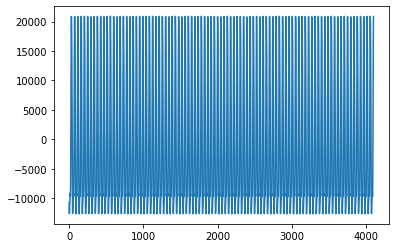

In [81]:
plt.plot(pred)

In [82]:
reg.coef_

array([[-1.52527641e+04,  2.37408233e+03, -8.47774352e+02,
         3.90921792e+02,  9.66134487e+01, -4.40417551e+03,
        -5.76954062e+03,  2.20127439e+02, -8.95819569e+02,
         1.28911999e+02, -5.46593894e+01,  1.67756105e+01,
         1.27565980e-01, -6.76299098e-01,  2.52338391e+00,
        -5.53382553e+00,  1.93529409e+01,  1.04130790e+01,
         4.10743494e+00, -5.78289223e-02, -2.44073152e+01]])

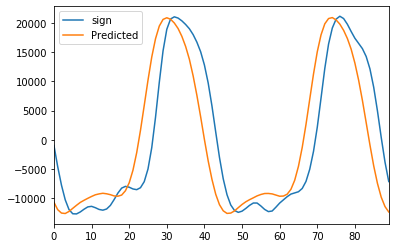

In [83]:
sins["Predicted"]=pred
sins[["sign","Predicted"]][0:90].plot()

In [84]:
a=sins["Predicted"]

In [85]:
zz=44100*3/4100

In [86]:
sigout=np.array(a)
signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout=np.append(sigout,a)
    signalorig=np.append(signalorig,np.array(sins["sign"]))

In [87]:
sigout

array([-10689.28467139, -11953.06090759, -12533.00877784, ...,
        19790.28588066,  20715.56179731,  20854.75936347])

In [88]:
scaledsig = np.int16(sigout/np.max(np.abs(sigout)) * 32767)
scipy.io.wavfile.write("FluteReproduced.wav", 44100, scaledsig)
scipy.io.wavfile.write("Flute.wav", 44100, signalorig)


In [89]:
cof=reg.coef_

In [90]:
t=np.arange(4100)
omega=2*np.pi/100.22
a=np.sin(omega*t)
# a1=np.sin(omega*t)
b=np.sin(2*omega*t)
# b1=np.sin(2*omega*t)
c=np.sin(3*omega*t)
# d=5*np.sin(8*omega*t)
d=np.sin(4*omega*t)
e=np.sin(5*omega*t)
f=np.cos(omega*t)
g=np.cos(2*omega*t)
h=np.cos(3*omega*t)
i=np.cos(4*omega*t)
j=np.cos(5*omega*t)
a1=np.sin(6*omega*t)
# a1=np.sin(omega*t)
b1=np.sin(7*omega*t)
# b1=np.sin(2*omega*t)
c1=np.sin(8*omega*t)
# d=5*np.sin(8*omega*t)
d1=np.sin(9*omega*t)
e1=np.sin(10*omega*t)
f1=np.cos(6*omega*t)
g1=np.cos(7*omega*t)
h1=np.cos(8*omega*t)
i1=np.cos(9*omega*t)
j1=np.cos(10*omega*t)
sins2=pd.DataFrame()
sins2["a"]=a
sins2["b"]=b
sins2["c"]=c
sins2["d"]=d
sins2["e"]=e
sins2["f"]=f
sins2["g"]=g
sins2["h"]=h
sins2["i"]=i
sins2["j"]=j
sins2["a1"]=a1
sins2["b1"]=b1
sins2["c1"]=c1
sins2["d1"]=d1
sins2["e1"]=e1
sins2["f1"]=f1
sins2["g1"]=g1
sins2["h1"]=h1
sins2["i1"]=i1
sins2["j1"]=j1
sins2["n"]=n.reshape(-1,1)
fsign=sins2*cof
z=fsign.sum(axis = 1, skipna = True) 
z.shape


(4100,)

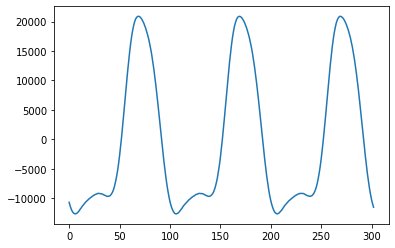

In [91]:
sigout1=np.array(z)
# signalorig=np.array(sins["sign"])
for _ in range(int(zz)):
    sigout1=np.append(sigout1,z)
#     signalorig=np.append(signalorig,np.array(sins["sign"]))
plt.plot(z[0:303])
scaledsig1 = np.int16(sigout1/np.max(np.abs(sigout1)) * 32767)
scipy.io.wavfile.write("Flute440.wav", 44100, scaledsig1)


In [92]:
def freq_calc(sig):
    rep=0
    for i in range(len(sig)-1):
        if sig[i+1]>=0 and sig[i]<=0:
            rep+=1
    return len(sig)/rep

freq_calc(sig)    
44100/43.61

1011.2359550561798

In [93]:
44100/1008

43.75

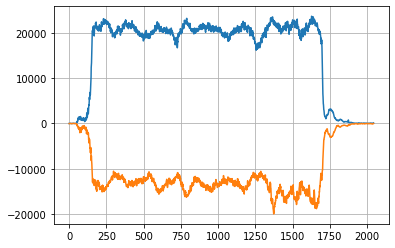

In [94]:
signal=wave
sig = np.array(signal[:, 0]).reshape(-1, 1)
def envelope_calc(sig):
    max_val=[]
    min_val=[]
    for i in range(0,len(sig),44):
        max_val.append(max(sig[i:i+43]))
        min_val.append(min(sig[i:i+43]))
    return max_val,min_val
env1,env2=envelope_calc(sig)
plt.plot(env1)
plt.plot(env2)
plt.grid()